In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
stock_data = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
stock_prices = stock_data['Close'].values 

[*********************100%%**********************]  1 of 1 completed


In [3]:
num_states = 100  
num_actions = 3  
episodes = 1000
episodes_display = 100

In [6]:
price_range = max(stock_prices) - min(stock_prices)
ep_rewards = []
ep_rewards_table = {'ep': [], 'avg': [], 'min': [], 'max': []}

# Función de discretización para convertir el precio de la acción a valor discreto
def discretised_state(price, price_range):
    return min(int(price / price_range * num_states), num_states - 1)

# Función de recompensa
def get_reward(action, price_change):
    if action == 0:  # Buy
        return price_change
    elif action == 2:  # Sell
        return -price_change
    else:  # Hold
        return 0

for episode in range(episodes):
    episode_reward = 0
    state_array = stock_prices[0]  # Obtener solo el array del estado
    curr_discrete_state = discretised_state(state_array, price_range)  # Estado inicial del entorno discretizado
    done = False
    i = 0  # Contador para el paso del tiempo
    
    # Determinar si se debe renderizar el estado en este episodio
    if episode % episodes_display == 0:
        render_state = True
    else:
        render_state = False

    while not done:
        if i < len(stock_prices) - 1:
            action = random.choice([0, 1, 2])  # Elección de la acción aleatoria (comprar, vender, mantener)
            new_state_array = stock_prices[i + 1]
            reward = get_reward(action, new_state_array - state_array)
            new_discrete_state = discretised_state(new_state_array, price_range)
            done = False
        else:
            new_state_array = state_array
            reward = 0
            new_discrete_state = curr_discrete_state
            done = True

        i += 1
        curr_discrete_state = new_discrete_state
        state_array = new_state_array
        episode_reward += reward

    ep_rewards.append(episode_reward)
    
    if not episode % episodes_display: 
        avg_reward = sum(ep_rewards[-episodes_display:])/len(ep_rewards[-episodes_display:])  # Si el número actual es divisible, mostrar resultado        
        ep_rewards_table['ep'].append(episode)
        ep_rewards_table['avg'].append(avg_reward)
        ep_rewards_table['min'].append(min(ep_rewards[-episodes_display:]))
        ep_rewards_table['max'].append(max(ep_rewards[-episodes_display:]))          
        print(f"Episode:{episode} avg:{avg_reward} min:{min(ep_rewards[-episodes_display:])} max:{max(ep_rewards[-episodes_display:])}")


Episode:0 avg:51.55489730834961 min:51.55489730834961 max:51.55489730834961
Episode:100 avg:-3.6662394332885744 min:-139.5299835205078 max:220.13267135620117
Episode:200 avg:2.3541853713989256 min:-123.65713119506836 max:183.5222930908203
Episode:300 avg:4.9911325073242185 min:-159.99963760375977 max:176.84495544433594
Episode:400 avg:1.6524654388427735 min:-141.08998489379883 max:172.7999610900879
Episode:500 avg:2.9875302505493164 min:-166.40466690063477 max:206.67489624023438
Episode:600 avg:-2.5599058151245115 min:-198.7050323486328 max:203.3400421142578
Episode:700 avg:-5.6985858535766605 min:-157.99517822265625 max:181.88257598876953
Episode:800 avg:-7.620924186706543 min:-169.99248886108398 max:158.44740295410156
Episode:900 avg:-12.579413986206054 min:-212.57505416870117 max:118.34502410888672


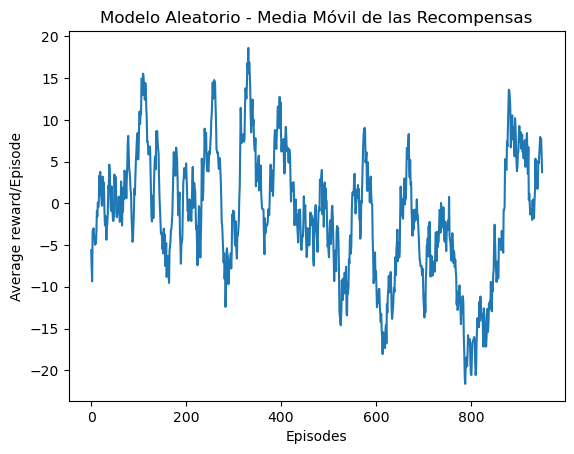

In [7]:
window_size = 50
moving_avg_rewards = np.convolve(ep_rewards, np.ones(window_size)/window_size, mode='valid')

plt.plot(np.arange(len(moving_avg_rewards)), moving_avg_rewards)
plt.title('Modelo Aleatorio - Media Móvil de las Recompensas')
plt.ylabel('Average reward/Episode')
plt.xlabel('Episodes')
plt.show()

In [8]:
convergence_rate = (ep_rewards_table['avg'][-1] - ep_rewards_table['avg'][0]) / len(ep_rewards_table['avg'])
print("Tasa de convergencia:", convergence_rate)

Tasa de convergencia: -6.4134311294555655
